In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [45]:
def preprocess(data):

    X = data.data
    y = data.target

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    X_test = np.insert(X_test, 0, 1, axis = 1)  #bias for x_train is added in grad_descent()

    y_train = pd.get_dummies(y_train).values
    y_test = pd.get_dummies(y_test).values
    
    return X_train, X_test, y_train, y_test

In [9]:
def softmax(u):
    expu = np.exp(u)
    return expu / np.sum(expu)

In [10]:
def crossEntropy(p,q):
    return -np.vdot(p,np.log(q))

In [11]:
def grad_L(X,Y,beta):
    N = X.shape[0]
    L = 0.0
    
    for i in range(N):
        XiHat = X[i]
        Yi = Y[i]
        qi = softmax(beta @ XiHat)
        
        L += crossEntropy(Yi, qi)
        
    return L

In [41]:
def grad_descent(X,Y, alpha):
    numIters = 500
    N, d = X.shape
    X = np.insert(X,0,1,axis = 1)
    K = Y.shape[1]
    
    beta = np.zeros((K, d+1))
    Lvals = []
    
    for num in range(numIters):
        
        L = grad_L(X,Y,beta)
        Lvals.append(L)

        grad = 0
            
        for i in range(N):     #one row from the training data at a time

            XiHat = X[i]
            Yi = Y[i]

            qi = softmax(beta @ XiHat)
            grad_Li = np.outer(qi - Yi, XiHat)
            grad += grad_Li            #grad is the loss for one iter of training data

        beta = beta - alpha * grad
    
    
    return beta, Lvals

In [47]:
# prediction
def predict(X_test, y_test, beta):
    N = X_test.shape[0]
    K = 3
    total = 0

    for i in range(N):
        xiHat = X_test[[i]]
        yi = np.zeros((K,1))
        yi[y_test[i]] = 1

        qi = softmax(beta @ xiHat.transpose())
        max_prob = qi.argmax()                         #get index of highest probability in my ith example

        test_pred = np.zeros((K,1))                   
        test_pred[max_prob] = 1                       #convert probability vector to a vector with 0 and 1 only

        check = np.vdot(test_pred, yi)                #element wise multiplication, if match, then check = 1, if no match, check = 0 
        total += check

    print("Accuracy: ", (total / N) * 100, "%")

Accuracy:  63.33333333333333 %


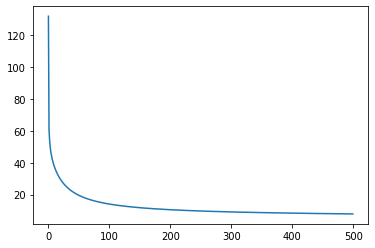

In [49]:
data = datasets.load_iris()
X_train, X_test, y_train, y_test = preprocess(data)

alpha = 0.01
beta, Lvals = grad_descent(X_train, y_train, alpha)

plt.plot(Lvals)

predict(X_test, y_test, beta)